In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
A = np.array([1, 3, 4, 5, 6])
b = np.ravel([[a]*2 for a in A])
print(A, b)

[1 3 4 5 6] [1 1 3 3 4 4 5 5 6 6]


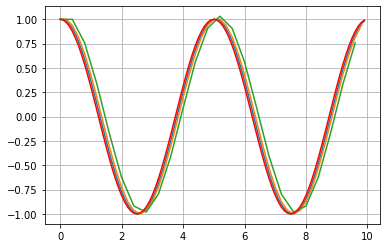

In [2]:
def Ysol(dx):
    L = 10
    A = 1
    lambdap=L/2
    k = 2*np.pi/lambdap
    x = np.arange(0, L, dx)
    y = np.zeros(len(x))
    y[0]=A
    for ix in range(len(x)-1):
        y[ix+1] = y[ix]-A*k*np.sin(k*x[ix])*dx
    yth = A*np.cos(k*x)
    return x, dx, y, yth

# y = A cos(k x)
# dy/dx = -A k sin(k x)
# dy = -A k sin(k x) dx
# y(i+1)-y(i) = -A k sin(k x) dx
# y(i+1) = y(i) -A k sin(k x) dx
    
dxmin = 0.1
x1, dx1, y1, yth1 = Ysol(dxmin*4)
x2, dx2, y2, yth2 = Ysol(dxmin*2)
x3, dx3, y3, yth3 = Ysol(dxmin)

plt.plot(x3, y3)
plt.plot(x2, y2)
plt.plot(x1, y1)
plt.plot(x3, yth3, 'r-')
plt.grid()

2.0082935347575273
1.0059701508570278


/home/robynm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/robynm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


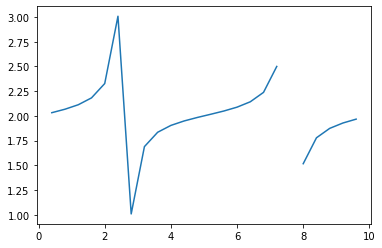

In [7]:
c = (y1-y2[0::2])/(y2[0::2]-y3[0::4])
cmean = np.mean(c[np.logical_and(~np.isnan(c), ~np.isinf(c))])
print(cmean)
nfromc = np.log(cmean)/np.log(2)
print(nfromc)
plt.plot(x1, c)

In [4]:
dxmins = [1, 0.5, 0.1, 0.05, 0.01]
conves = [44.36, 4.47, 4.01, 4.00, 4.00]

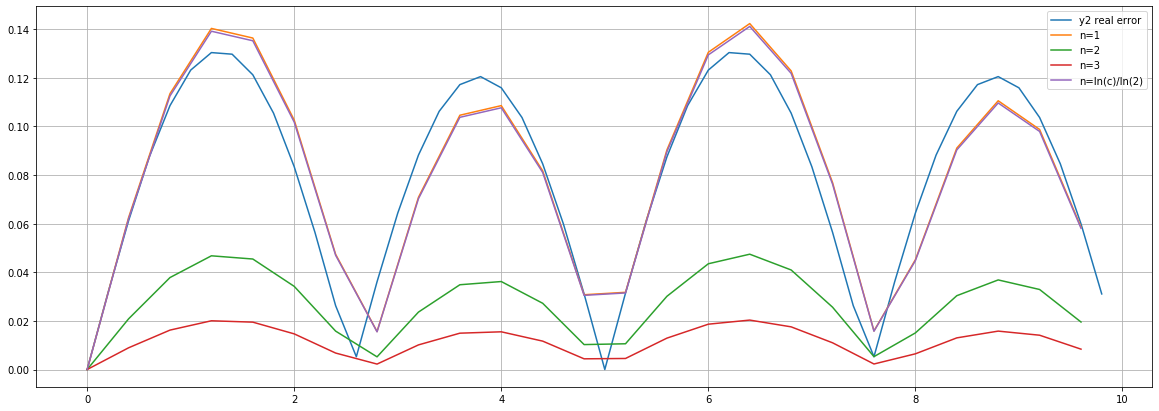

In [5]:
y12diff = abs(y1-y2[0::2])
y2err = [y12diff/((2**n)-1) for n in range(1,4)]
y2err += [y12diff/((2**nfromc)-1)]
plt.figure(figsize=(20,7))
plt.plot(x2, abs(yth2-y2), label='y2 real error')
plt.plot(x1, y2err[0], label='n=1')
plt.plot(x1, y2err[1], label='n=2')
plt.plot(x1, y2err[2], label='n=3')
plt.plot(x1, y2err[3], label='n=ln(c)/ln(2)')
plt.legend(loc="best")
plt.grid()

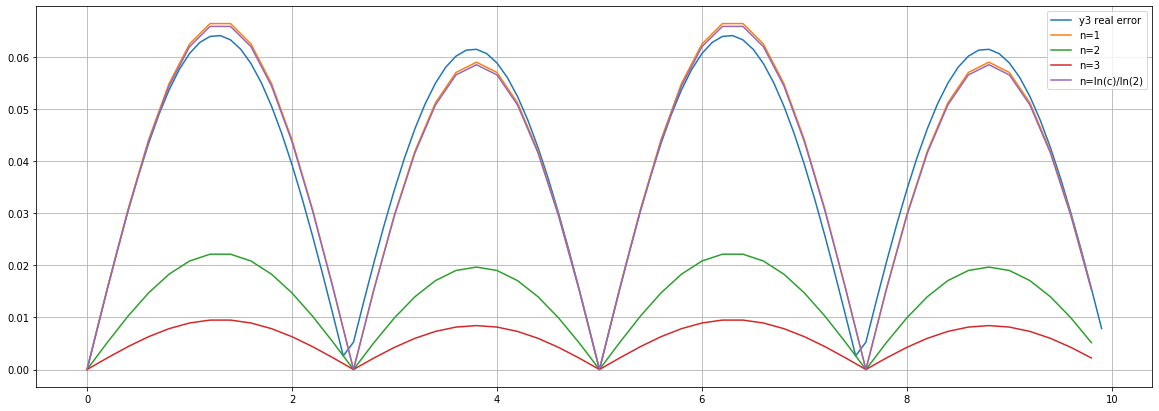

In [6]:
y23diff = abs(y2-y3[0::2])
y3err = [y23diff/((2**n)-1) for n in range(1,4)]
y3err += [y23diff/((2**nfromc)-1)]
yprev = abs(4*y3[0::4]-3*y2[0::2]-y1)/6
plt.figure(figsize=(20,7))
plt.plot(x3, abs(yth3-y3), label='y3 real error')
plt.plot(x2, y3err[0], label='n=1')
plt.plot(x2, y3err[1], label='n=2')
plt.plot(x2, y3err[2], label='n=3')
plt.plot(x2, y3err[3], label='n=ln(c)/ln(2)')
plt.legend(loc="best")
plt.grid()